In [11]:

#Cargue de paquete para el análisis de datos
import pandas as pd
import matplotlib.pyplot as plt

# # Cargar datos del análisis, desde un archivo CSV
df = pd.read_csv("01_jun_2025_grupo 4_rows_44706_value_columns_18.csv", sep = ",") #or sep ;
print(df.head)

<bound method NDFrame.head of        ID_NUMERIC_     A_RECEP_FECHA_RECIB_ TF_DEPARTAMENTO_ TF_MUNICIPIO_  \
0           195528  2021-12-07 12:41:35.020               25         25873   
1           195529  2021-12-07 12:41:35.020               25         25873   
2           195530  2021-12-07 12:41:35.037               25         25873   
3           195531  2021-12-07 12:41:35.037               25         25873   
4           195532  2021-12-07 12:41:35.050               25         25873   
...            ...                      ...              ...           ...   
44701        59355  2020-08-04 13:10:58.000               54         54174   
44702        62987  2020-08-21 15:31:41.830               25         25426   
44703        62988  2020-08-21 15:31:41.847               25         25426   
44704        63184  2020-08-25 11:16:47.707               68         68397   
44705        59357  2020-08-04 13:10:58.480               15         15837   

      TF_CENTRO_POBLADO_ TF_CULTI

In [12]:
# Crear una lista para almacenar observaciones
observaciones = []

# Iterar sobre cada fila para verificar las condiciones
for index, row in df.iterrows():
    obs = []

    # Asignación de variables para legibilidad
    pH = row["VALUE_pH (1:2,5)"]
    CE = row["VALUE_Conductividad eléctrica (CE) (1:5)"]
    Al_H = row["VALUE_Acidez (Al+H)"]
    Al = row["VALUE_Aluminio (Al) Intercambiable"]
    S = row["VALUE_Azufre (S) disponible"]
    P = row["VALUE_Fosforo (P) Disponible (Bray II)"]
    Ca = row["VALUE_Calcio (Ca) disponible"]
    Mg = row["VALUE_Magnesio (Mg) Disponible"]
    K = row["VALUE_Potasio (K) Disponible"]
    Na = row["VALUE_Sodio (Na) Disponible"]
    B = row["VALUE_Boro (B) Disponible"]
    Fe = row["VALUE_Hierro (Fe) olsen Disponible"]
    CICE = row["VALUE_Capacidad Interc Catiónico Efect (CICE)"]
    CO = row["VALUE_Carbono Orgánico (CO)"]
    Cu = row["VALUE_Cobre (Cu) olsen Disponible"]
    Mn = row['VALUE_Manganeso (Mn) olsen Disponible']
    MO = row['VALUE_Materia Orgánica (MO)']
    Zn = row['VALUE_Zinc (Zn) olsen Disponible']
                    
    # Reglas generales
    if pH < 3 or pH > 11:
        obs.append("pH fuera de rango (<3 o >11)")
    if CE <= 0 or CE > 40:
        obs.append("CE fuera de rango (=0 o >40)")
    if Al_H > 10:
        obs.append("Al+H > 10")
    if Al > 10:
        obs.append("Al > 10")
    if Al > Al_H:
        obs.append("Al > Al+H")
    if S <= 0 or S > 600:
        obs.append("S fuera de rango (=0 o >600)")
    if P <= 0 or P > 600:
        obs.append("P fuera de rango (=0 o >600)")
    if Ca <= 0 or Ca > 30:
        obs.append("Ca fuera de rango (=0 o >30)")
    if Mg <= 0 or Mg > 10:
        obs.append("Mg fuera de rango (=0 o >10)")
    if K <= 0 or K > 10:
        obs.append("K fuera de rango (=0 o >10)")
    if Mg > Ca:
        obs.append("Mg > Ca")

    # Reglas condicionales según diferentes parámetros
    if pH < 5:
        if Al_H == 0:
            obs.append("pH<5 y Al+H=0")
        if Al == 0:
            obs.append("pH<5 y Al=0")
        if Ca > 6:
            obs.append("pH<5 y Ca>6")
        if Mg > 2.5:
            obs.append("pH<5 y Mg>2.5")
        if K > 1:
            obs.append("pH<5 y K>1")
        if CE > 2:
            obs.append("pH<5 y CE>2")
        if Na > 1:
            obs.append("pH<5 y Na>1")
        if B > 1:
            obs.append("pH<5 y B>1")
        if Fe < 50:
            obs.append("pH<5 y Fe<50")
    if pH > 7:
        if Al_H > 0:
            obs.append("pH>7 y Al+H>0")
        if Al > 0:
            obs.append("pH>7 y Al>0")
        if Ca < 6:
            obs.append("pH>7 y Ca<6")
        if Mg < 2.5:
            obs.append("pH>7 y Mg<2.5")
        if K < 1:
            obs.append("pH>7 y K<1")
        if Fe > 50:
            obs.append("pH>7 y Fe>50")
    if pH > 8:
        if Na <= 1:
            obs.append("pH>8 y Na<=1")
    if CE > 4:
        if Na <= 1:
            obs.append("CE>4 y Na<=1")
        if S <= 20:
            obs.append("CE>4 y S<=20")
    if 3 < pH < 4:
        if CE <= 2:
            obs.append("3<pH<4 y CE<=2")
        if S <= 20:
            obs.append("3<pH<4 y S<=20")
        if Na <= 1:
            obs.append("3<pH<4 y Na<=1")

    # Agregar observaciones a la lista
    observaciones.append("; ".join(obs) if obs else "")

# Añadir columna de observaciones al DataFrame
df["observaciones"] = observaciones

# Filtrar solo las filas con observaciones
df_atipicos = df[df["observaciones"] != ""]

#Guardar el DataFrame modificado en un nuevo archivo CSV
# df_atipicos.to_csv("Observaciones_final.csv", sep=";", index=False)
#print("Archivo 'validac_reglas_final.csv' creado exitosamente.")


In [13]:
# Reemplazar el nombre de las columnas de las variables  
df.rename(columns={"VALUE_pH (1:2,5)": "pH"}, inplace=True)
df.rename(columns={"VALUE_Conductividad eléctrica (CE) (1:5)": "CE"}, inplace=True)
df.rename(columns={"VALUE_Acidez (Al+H)": "Al_H"}, inplace=True)
df.rename(columns={"VALUE_Aluminio (Al) Intercambiable": "Al"}, inplace=True)
df.rename(columns={"VALUE_Azufre (S) disponible": "S"}, inplace=True)
df.rename(columns={"VALUE_Fosforo (P) Disponible (Bray II)": "P"}, inplace=True)    
df.rename(columns={"VALUE_Calcio (Ca) disponible": "Ca"}, inplace=True)                   
df.rename(columns={"VALUE_Magnesio (Mg) Disponible": "Mg"}, inplace=True)
df.rename(columns={"VALUE_Potasio (K) Disponible": "K"}, inplace=True)
df.rename(columns={"VALUE_Sodio (Na) Disponible": "Na"}, inplace=True)
df.rename(columns={"VALUE_Boro (B) Disponible": "B"}, inplace=True)  
df.rename(columns={"VALUE_Hierro (Fe) olsen Disponible": "Fe"}, inplace=True)                 
df.rename(columns={"VALUE_Capacidad Interc Catiónico Efect (CICE)": "CICE"}, inplace=True)
df.rename(columns={"VALUE_Carbono Orgánico (CO)": "CO"}, inplace=True)
df.rename(columns={"VALUE_Cobre (Cu) olsen Disponible": "Cu"}, inplace=True)
df.rename(columns={"VALUE_Manganeso (Mn) olsen Disponible": "Mn"}, inplace=True)
df.rename(columns={"VALUE_Materia Orgánica (MO)": "MO"}, inplace=True)
df.rename(columns={"VALUE_Zinc (Zn) olsen Disponible": "Zn"}, inplace=True)

# Reemplazar el nombre de las columnas de las variables de atípicos
df.rename(columns={"BIN_VALUE_pH (1:2,5)": "ATP_pH"}, inplace=True)
df.rename(columns={"BIN_VALUE_Conductividad eléctrica (CE) (1:5)": "ATP_CE"}, inplace=True)
df.rename(columns={"BIN_VALUE_Acidez (Al+H)": "ATP_Al_H"}, inplace=True)
df.rename(columns={"BIN_VALUE_Aluminio (Al) Intercambiable": "ATP_Al"}, inplace=True)
df.rename(columns={"BIN_VALUE_Azufre (S) disponible": "ATP_S"}, inplace=True)
df.rename(columns={"BIN_VALUE_Fosforo (P) Disponible (Bray II)": "ATP_P"}, inplace=True)    
df.rename(columns={"BIN_VALUE_Calcio (Ca) disponible": "ATP_Ca"}, inplace=True)                   
df.rename(columns={"BIN_VALUE_Magnesio (Mg) Disponible": "ATP_Mg"}, inplace=True)
df.rename(columns={"BIN_VALUE_Potasio (K) Disponible": "ATP_K"}, inplace=True)
df.rename(columns={"BIN_VALUE_Sodio (Na) Disponible": "ATP_Na"}, inplace=True)
df.rename(columns={"BIN_VALUE_Boro (B) Disponible": "ATP_B"}, inplace=True)  
df.rename(columns={"BIN_VALUE_Hierro (Fe) olsen Disponible": "ATP_Fe"}, inplace=True)                 
df.rename(columns={"BIN_VALUE_Capacidad Interc Catiónico Efect (CICE)": "ATP_CICE"}, inplace=True)
df.rename(columns={"BIN_VALUE_Carbono Orgánico (CO)": "ATP_CO"}, inplace=True)
df.rename(columns={"BIN_VALUE_Cobre (Cu) olsen Disponible": "ATP_Cu"}, inplace=True)
df.rename(columns={"BIN_VALUE_Manganeso (Mn) olsen Disponible": "ATP_M  n"}, inplace=True)
df.rename(columns={"BIN_VALUE_Materia Orgánica (MO)": "ATP_MO"}, inplace    =True)
df.rename(columns={"BIN_VALUE_Zinc (Zn) olsen Disponible": "ATP_Zn  "}, inplace=True)

print("ok")



ok


In [14]:

##Validación de reglas generales
df["Validac_pH"] = (df["observaciones"].str.contains("pH fuera de rango (<3 o >11)", regex=False)).map({True: 1, False: 0})
df["Validac_CE"] = (df["observaciones"].str.contains("CE fuera de rango (=0 o >40)", regex=False)).map({True: 1, False: 0})
df["Validac_Al_H"] = ((df["observaciones"].str.contains("Al+H > 10", regex=False))).map({True: 1, False: 0})
df["Validac_Al"] = ((df["observaciones"].str.contains("Al > 10", regex=False))).map({True: 1, False: 0})
df["Validac_S"] = ((df["observaciones"].str.contains("S fuera de rango (=0 o >600)", regex=False))).map({True: 1, False: 0})
df["Validac_P"] = ((df["observaciones"].str.contains("P fuera de rango (=0 o >600)", regex=False))).map({True: 1, False: 0})
df["Validac_K"] = ((df["observaciones"].str.contains("K fuera de rango (=0 o >10)", regex=False))).map({True: 1, False: 0})
df["Validac_Ca"] = ((df["observaciones"].str.contains("Ca fuera de rango (=0 o >30)", regex=False))).map({True: 1, False: 0})
df["Validac_Mg"] = ((df["observaciones"].str.contains("Mg fuera de rango (=0 o >10)", regex=False))).map({True: 1, False: 0})

df["Validac_pH_Al_H"] = ((df["observaciones"].str.contains("pH<5 y Al+H=0", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Al"] = ((df["observaciones"].str.contains("pH<5 y Al=0", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Ca"] = ((df["observaciones"].str.contains("pH<5 y Ca>6", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Mg"] = ((df["observaciones"].str.contains("pH<5 y Mg>2.5", regex=False))).map({True: 1, False: 0})
df["Validac_pH_K"] = ((df["observaciones"].str.contains("pH<5 y K>1", regex=False))).map({True: 1, False: 0})
df["Validac_pH_CE"] = ((df["observaciones"].str.contains("pH<5 y CE>2", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Na"] = ((df["observaciones"].str.contains("pH<5 y Na>1", regex=False))).map({True: 1, False: 0})
df["Validac_pH_B"] = ((df["observaciones"].str.contains("pH<5 y B>1", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Fe"] = ((df["observaciones"].str.contains("pH<5 y Fe<50", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Al_H_2"] = ((df["observaciones"].str.contains("pH>7 y Al+H>0", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Al_2"] = ((df["observaciones"].str.contains("pH>7 y Al>0", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Ca_2"] = ((df["observaciones"].str.contains("pH>7 y Ca<6", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Mg_2"] = ((df["observaciones"].str.contains("pH>7 y Mg<2.5", regex=False))).map({True: 1, False: 0})
df["Validac_pH_K_2"] = ((df["observaciones"].str.contains("pH>7 y K<1", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Fe_2"] = ((df["observaciones"].str.contains("pH>7 y Fe>50", regex=False))).map({True: 1, False: 0})
df["Validac_pH_Na_2"] = ((df["observaciones"].str.contains("pH>8 y Na<=1", regex=False))).map({True: 1, False: 0})
df["Validac_CE_Na"] = ((df["observaciones"].str.contains("CE>4 y Na<=1", regex=False))).map({True: 1, False: 0})
df["Validac_CE_S"] = ((df["observaciones"].str.contains("CE>4 y S<=20", regex=False))).map({True: 1, False: 0})
df["Validac_pH_CE_2"] = ((df["observaciones"].str.contains("3<pH<4 y CE<=2", regex=False))).map({True: 1, False: 0})
df["Validac_pH_S"] = ((df["observaciones"].str.contains("3<pH<4 y S<=20", regex=False))).map({True: 1, False: 0})
df["Validac_3_pH_Na"] = ((df["observaciones"].str.contains("3<pH<4 y Na<=1, regex=False"))).map({True: 1, False: 0})   
df["Validac_Al_Al+H"] = ((df["observaciones"].str.contains("Al > Al+H", regex=False))).map({True: 1, False: 0})
df["Validac_Al+H_Mg"] = ((df["observaciones"].str.contains("Al+H > 10; Mg > Ca", regex=False))).map({True: 1, False: 0})
df["Validac_Mg_Ca"] = ((df["observaciones"].str.contains("Mg > Ca", regex=False))).map({True: 1, False: 0})
df["Validac_S_Ca"] = ((df["observaciones"].str.contains("S fuera de rango (=0 o >600); Ca fuera de rango (=0 o >30)", regex=False))).map({True: 1, False: 0})
df["Validac_S_Mg"] = ((df["observaciones"].str.contains("S fuera de rango (=0 o >600); Mg > Ca)", regex=False))).map({True: 1, False: 0})
df["Validac_pH_CE_Na"] = ((df["observaciones"].str.contains("pH<5 y CE>2; 3<pH<4 y Na<=1", regex=False))).map({True: 1, False: 0})

print("ok")

# #
# df["ATP_pH_Al_H"] = ((df["ATP_pH"] == 1) & (df["ATP_Al_H"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Al"] = ((df["ATP_pH"] == 1) & (df["ATP_Al"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Ca"] = ((df["ATP_pH"] == 1) & (df["ATP_Ca"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Mg"] = ((df["ATP_pH"] == 1) & (df["ATP_Mg"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_K"] = ((df["ATP_pH"] == 1) & (df["ATP_K"]== 1)).map({True: 1, False: 0})
# df["ATP_pH_CE"] = ((df["ATP_pH"] == 1) & (df["ATP_CE"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Na"] = ((df["ATP_pH"] == 1) & (df["ATP_Na"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_B"] = ((df["ATP_pH"] == 1) & (df["ATP_B"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Fe"] = ((df["ATP_pH"] == 1) & (df["ATP_Fe"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Al_H_2"] = ((df["ATP_pH"] ==1) & (df["ATP_Al_H"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Al_2"] = ((df["ATP_pH"] == 1) & (df["ATP_Al"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Ca_2"] = ((df["ATP_pH"] == 1) & (df["ATP_Ca"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Mg_2"] = ((df["ATP_pH"] == 1) & (df["ATP_Mg"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_K_2"] = ((df["ATP_pH"] == 1) & (df["ATP_K"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Fe_2"] = ((df["ATP_pH"] == 1) & (df["ATP_Fe"] == 1)).map({True: 1, False: 0})
# df["ATP_pH_Na"] = ((df["ATP_pH"] == 1) & (df["ATP_Na"] == 1)).map({True: 1, False: 0})
# df["ATP_CE_Na"] = ((df["ATP_CE"] == 1) & (df["ATP_Na"] == 1)).map({True: 1, False: 0})
# df["ATP_CE_S"] = ((df["ATP_CE"] == 1) & (df["ATP_S"] == 1)).map({True: 1, False: 0})
# df["ATP_3_pH_4_CE"] = ((df["ATP_pH"] == 1) & (df["ATP_CE"] == 1)).map({True: 1, False: 0})
# df["ATP_3_pH_4_S"] = ((df["ATP_pH"] == 1) & (df["ATP_S"] == 1)).map({True: 1, False: 0})
# df["ATP_3_pH_4_Na"] = ((df["ATP_pH"] == 1) & (df["ATP_Na"] == 1)).map({True: 1, False: 0})

# # #Atípicas usando reglas condicionales
# df["Validac_pH_Al_H"] = ((df["observaciones"].str.contains("pH<5 y Al+H=0")) & (df["ATP_pH_Al_H"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Al"] = ((df["observaciones"].str.contains("pH<5 y Al=0")) & (df["ATP_pH_Al"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Ca"] = ((df["observaciones"].str.contains("pH<5 y Ca>6")) & (df["ATP_pH_Ca"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Mg"] = ((df["observaciones"].str.contains("pH<5 y Mg>2.5")) & (df["ATP_pH_Mg"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_K"] = ((df["observaciones"].str.contains("pH<5 y K>1")) & (df["ATP_pH_K"]== 1)).map({True: 1, False: 0})
# df["Validac_pH_CE"] = ((df["observaciones"].str.contains("pH<5 y CE>2")) & (df["ATP_pH_CE"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Na"] = ((df["observaciones"].str.contains("pH<5 y Na>1")) & (df["ATP_pH_Na"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_B"] = ((df["observaciones"].str.contains("pH<5 y B>1")) & (df["ATP_pH_B"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Fe"] = ((df["observaciones"].str.contains("pH<5 y Fe<50")) & (df["ATP_pH_Fe"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Al_H_2"] = ((df["observaciones"].str.contains("pH>7 y Al+H>0")) & (df["ATP_pH_Al_H_2"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Al_2"] = ((df["observaciones"].str.contains("pH>7 y Al>0")) & (df["ATP_pH_Al_2"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Ca_2"] = ((df["observaciones"].str.contains("pH>7 y Ca<6")) & (df["ATP_pH_Ca_2"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Mg_2"] = ((df["observaciones"].str.contains("pH>7 y Mg<2.5")) & (df["ATP_pH_Mg_2"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_K_2"] = ((df["observaciones"].str.contains("pH>7 y K<1")) & (df["ATP_pH_K_2"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Fe_2"] = ((df["observaciones"].str.contains("pH>7 y Fe>50")) & (df["ATP_pH_Fe_2"] == 1)).map({True: 1, False: 0})
# df["Validac_pH_Na"] = ((df["observaciones"].str.contains("pH>8 y Na<=1")) & (df["ATP_pH_Na"] == 1)).map({True: 1, False: 0})
# df["Validac_CE_Na"] = ((df["observaciones"].str.contains("CE>4 y Na<=1")) & (df["ATP_CE_Na"] == 1)).map({True: 1, False: 0})
# df["Validac_CE_S"] = ((df["observaciones"].str.contains("CE>4 y S<=20")) & (df["ATP_CE_S"] == 1)).map({True: 1, False: 0})
# df["Validac_3_pH_4_CE"] = ((df["observaciones"].str.contains("3<pH<4 y CE<=2")) & (df["ATP_3_pH_4_CE"] == 1)).map({True: 1, False: 0})
# df["Validac_3_pH_4_S"] = ((df["observaciones"].str.contains("3<pH<4 y S<=20")) & (df["ATP_3_pH_4_S"] == 1)).map({True: 1, False: 0})
# df["Validac_3_pH_4_Na"] = ((df["observaciones"].str.contains("3<pH<4 y Na<=1")) & (df["ATP_3_pH_4_Na"] == 1)).map({True: 1, False: 0})


#Generación de df
# df.to_csv("validac_reglas.csv", sep=";", index=False)
# print("Archivo 'validac_reglas.csv' creado exitosamente.")


ok


In [15]:
# Crear la columna 'Validac_ATP' si al menos una columna que empieza con 'Validac_'
validac_cols = [col for col in df.columns if col.startswith("Validac_")]
df["Validac_ATP"] = (df[validac_cols].sum(axis=1) >= 1).astype(int)

# Crear la columna 'Validac_global' como combinación de 'BIN_ATP' y 'Validac_ATP'
df["Validac_global"] = ((df["BIN_ATP"] == 1) & (df["Validac_ATP"] == 1)).astype(int)

print("ok")

#Guardar el DataFrame modificado en un nuevo archivo CSV
# df.to_csv("validac_reglas_final.csv", sep=";", index=False)
# print("Archivo 'validac_reglas_final.csv' creado exitosamente.")

ok


In [16]:
# Contar cuántas filas tienen el valor 1 en la columna "ATP"
conteo_atp = df["BIN_ATP"].sum()

#Contar cuántas filas tienen el valor de 1 en la columna "Validac_ATP"
conteo_validac_atp = df["Validac_ATP"].sum()

# Contar cuántas filas tienen el valor 1 en la columna "Validac_global"
conteo_validac_global = df["Validac_global"].sum()

print(f'Filas con ATP=1: {conteo_atp}')
print(f'Filas con Validac_ATP=1: {conteo_validac_atp}')
print(f'Filas con Validac_global=1: {conteo_validac_global}')

Filas con ATP=1: 5698.0
Filas con Validac_ATP=1: 9236
Filas con Validac_global=1: 1872


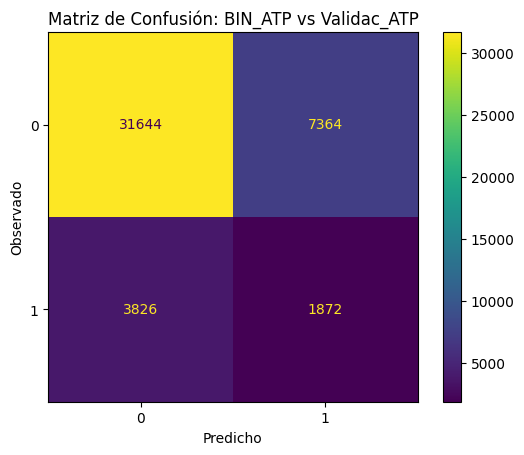

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión
cm = confusion_matrix(df["BIN_ATP"], df["Validac_ATP"], labels=[0, 1])

# Mostrar la matriz de confusión con etiquetas "true"/"false"
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xlabel("Predicho")
plt.ylabel("Observado")
plt.title("Matriz de Confusión: BIN_ATP vs Validac_ATP")
plt.show()

In [24]:


# Filtrar el DataFrame por Validac_ATP = 1 y ATP = 0
df_validac_atp = df[(df["Validac_ATP"] == 0) & (df["BIN_ATP"] == 1)]

df_validac_atp.to_csv("Sist_Exp_falso_pos.csv", sep=";", index=False)

# Filtrar el DataFrame por falsos negativos
df_validac_neg = df[(df["Validac_ATP"] == 1) & (df["BIN_ATP"] == 0)]

df_validac_neg.to_csv("Sist_Exp_falso_neg.csv", sep=";", index=False)

print("Archivos creados exitosamente.")

# # Lista de variables y sus columnas ATP correspondientes
# variables = [
#     ("ATP_pH", "Validac_pH"),
#     ("ATP_CE", "Validac_CE"),
#     ("ATP_Al_H", "Validac_Al_H"),
#     ("ATP_Al", "Validac_Al"),
#     ("ATP_S", "Validac_S"),
#     ("ATP_P", "Validac_P"),
#     ("ATP_Ca", "Validac_Ca"),
#     ("ATP_Mg", "Validac_Mg"),
#     ("ATP_K", "Validac_K"),
#     ("ATP_Na", "Validac_Na"),
#     ("ATP_B", "Validac_B"),
#     ("ATP_Fe", "Validac_Fe"),
#     ("ATP_CICE", "Validac_CICE"),
#     ("ATP_CO", "Validac_CO"),
#     ("ATP_Cu", "Validac_Cu")
# ]

#print(df_validac_atp)



Archivos creados exitosamente.


In [19]:
# Generar el conteo de cada columna que inicia con "ATP_" en df_validac_atp
atp_cols = [col for col in df_validac_atp.columns if col.startswith("ATP_")]
conteos_atp = df_validac_atp[atp_cols].sum()

print(conteos_atp)

ATP_Al_H     90.0
ATP_Al       90.0
ATP_S       879.0
ATP_B       777.0
ATP_Ca      444.0
ATP_CICE      4.0
ATP_CO      660.0
ATP_Cu      828.0
ATP_CE      658.0
ATP_P       920.0
ATP_Fe      828.0
ATP_Mg      444.0
ATP_M  n    828.0
ATP_MO        5.0
ATP_K       444.0
ATP_Na      444.0
ATP_Zn      828.0
ATP_pH      343.0
dtype: float64


In [25]:
# Generar el conteo de cada columna que inicia con "Validac_" en df_validac_atp
atp_Validac = [col for col in df_validac_neg.columns if col.startswith("Validac_")]
conteos_Validac = df_validac_neg[atp_Validac].sum()

print(conteos_Validac)

Validac_pH              1
Validac_CE             35
Validac_Al_H          258
Validac_Al            138
Validac_S             152
Validac_P             128
Validac_K              88
Validac_Ca           1370
Validac_Mg           1010
Validac_pH_Al_H         2
Validac_pH_Al          46
Validac_pH_Ca         402
Validac_pH_Mg         320
Validac_pH_K          263
Validac_pH_CE         203
Validac_pH_Na          76
Validac_pH_B           74
Validac_pH_Fe         142
Validac_pH_Al_H_2       1
Validac_pH_Al_2         0
Validac_pH_Ca_2       282
Validac_pH_Mg_2      1870
Validac_pH_K_2       4122
Validac_pH_Fe_2      1023
Validac_pH_Na_2      1171
Validac_CE_Na         136
Validac_CE_S            9
Validac_pH_CE_2       112
Validac_pH_S          100
Validac_3_pH_Na         0
Validac_Al_Al+H         2
Validac_Al+H_Mg         8
Validac_Mg_Ca         992
Validac_S_Ca           13
Validac_S_Mg            0
Validac_pH_CE_Na       11
Validac_ATP          7364
Validac_global          0
dtype: int64

In [20]:
# # Gráfica de barras comparando el conteo de BIN_pH y Validac_pH en df_validac_atp
# conteo_bin_ph = df_validac_atp["ATP_pH"].sum()
# cont_Al_H = df_validac_atp["ATP_Al_H"].sum()
# cont_validac_ph = df_validac_atp["Validac_pH_Al_H"].sum()

# df_plot = pd.DataFrame({
#     "ATP_pH": [conteo_bin_ph],
#     "ATP_Al_H": [cont_Al_H],
#     "Validac_pH_Al+H": [cont_validac_ph]
# }).fillna(0).astype(int)

# df_plot.plot(kind="bar")
# plt.xlabel(" ")
# plt.ylabel("Conteo")
# plt.title("Comparación de conteo: ATP_pH vs Validac_pH")
# plt.xticks(rotation=0)
# plt.show()

# #print(conteo_bin_ph, cont_Al_H, conteo_validac_ph)

In [21]:
# # Conteo para la validación condicional "pH<5 y Al=0"
# conteo_bin_ph = df_validac_atp["ATP_pH"].sum()
# cont_Al = df_validac_atp["ATP_Al"].sum()
# cont_validac_ph_al = df_validac_atp["Validac_pH_Al"].sum()

# df_plot_ph_al = pd.DataFrame({
#     "ATP_pH": [conteo_bin_ph],
#     "ATP_Al": [cont_Al],
#     "Validac_pH_Al": [cont_validac_ph_al]
# }).fillna(0).astype(int)

# df_plot_ph_al.plot(kind="bar")
# plt.xlabel(" ")
# plt.ylabel("Conteo")
# plt.title("Comparación de conteo condicional: pH<5 y Al=0")
# plt.xticks(rotation=0)
# plt.show()

In [22]:
# # Lista de tuplas: (nombre columna ATP, nombre columna Validac, etiqueta, título)
# graficas = [
#     ("ATP_Ca", "Validac_pH_Ca", "ATP_Ca", "Comparación de conteo condicional: pH<5 y Ca>6"),
#     ("ATP_Mg", "Validac_pH_Mg", "ATP_Mg", "Comparación de conteo condicional: pH<5 y Mg>2.5"),
#     ("ATP_K", "Validac_pH_K", "ATP_K", "Comparación de conteo condicional: pH<5 y K>1"),
#     ("ATP_CE", "Validac_pH_CE", "ATP_CE", "Comparación de conteo condicional: pH<5 y CE>2"),
#     ("ATP_Na", "Validac_pH_Na", "ATP_Na", "Comparación de conteo condicional: pH<5 y Na>1"),
#     ("ATP_B", "Validac_pH_B", "ATP_B", "Comparación de conteo condicional: pH<5 y B>1"),
#     ("ATP_Fe", "Validac_pH_Fe", "ATP_Fe", "Comparación de conteo condicional: pH<5 y Fe<50"),
#     ("ATP_Al_H", "Validac_pH_Al_H_2", "ATP_Al_H", "Comparación de conteo condicional: pH>7 y Al+H>0"),
#     ("ATP_Al", "Validac_pH_Al_2", "ATP_Al", "Comparación de conteo condicional: pH>7 y Al>0"),
#     ("ATP_Ca", "Validac_pH_Ca_2", "ATP_Ca", "Comparación de conteo condicional: pH>7 y Ca<6"),
#     ("ATP_Mg", "Validac_pH_Mg_2", "ATP_Mg", "Comparación de conteo condicional: pH>7 y Mg<2.5"),
#     ("ATP_K", "Validac_pH_K_2", "ATP_K", "Comparación de conteo condicional: pH>7 y K<1"),
#     ("ATP_Fe", "Validac_pH_Fe_2", "ATP_Fe", "Comparación de conteo condicional: pH>7 y Fe>50"),
#     ("ATP_Na", "Validac_pH_Na", "ATP_Na", "Comparación de conteo condicional: pH>8 y Na<=1"),
#     ("ATP_Na", "Validac_CE_Na", "ATP_Na", "Comparación de conteo condicional: CE>4 y Na<=1"),
#     ("ATP_S", "Validac_CE_S", "ATP_S", "Comparación de conteo condicional: CE>4 y S<=20"),
#     ("ATP_CE", "Validac_3_pH_4_CE", "ATP_CE", "Comparación de conteo condicional: 3<pH<4 y CE<=2"),
#     ("ATP_S", "Validac_3_pH_4_S", "ATP_S", "Comparación de conteo condicional: 3<pH<4 y S<=20"),
#     ("ATP_Na", "Validac_3_pH_4_Na", "ATP_Na", "Comparación de conteo condicional: 3<pH<4 y Na<=1"),
# ]

# for atp_col, validac_col, label, titulo in graficas:
#     conteo_atp = df_validac_atp[atp_col].sum() if atp_col in df_validac_atp else 0
#     conteo_validac = df_validac_atp[validac_col].sum() if validac_col in df_validac_atp else 0

#     df_plot_temp = pd.DataFrame({
#         atp_col: [conteo_atp],
#         validac_col: [conteo_validac]
#     }).fillna(0).astype(int)

#     df_plot_temp.plot(kind="bar")
#     plt.xlabel(" ")
#     plt.ylabel("Conteo")
#     plt.title(titulo)
#     plt.xticks(rotation=0)
#     plt.show()